<a href="https://colab.research.google.com/github/UjjwalSharma26/Capstone_EDA/blob/main/Ujjwal's_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#uploading a csv file
hotel_booking = pd.read_csv("/content/drive/MyDrive/capstone project/Hotel Bookings.csv")

In [16]:
#to see column names in a data
hotel_booking.head(100)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Resort Hotel,1,72,2015,July,27,3,0,2,2,...,A,0,No Deposit,0,Transient,73.80,0,1,Canceled,2015-06-29
96,Resort Hotel,1,63,2015,July,27,3,2,5,2,...,F,0,No Deposit,0,Transient,117.00,0,1,Canceled,2015-05-13
97,Resort Hotel,0,63,2015,July,27,3,2,5,3,...,E,0,No Deposit,0,Transient,196.54,0,1,Check-Out,2015-07-10
98,Resort Hotel,0,101,2015,July,27,3,2,5,2,...,D,0,No Deposit,0,Transient,99.30,1,2,Check-Out,2015-07-10


In [5]:
#let us find out length
len(hotel_booking)

119390

In [6]:
#let us find out no of rows and columns in a dataframe
hotel_booking.shape

(119390, 32)

In [7]:
#to find data type of each column
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#to find out if null values are present in a column of a dataset
hotel_booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
#replacing all NaN values in 'children' with 0 and 'country' with xyz
hotel_booking['children'].fillna(0,inplace=True)
hotel_booking['country'].fillna('xyz',inplace=True)

In [10]:
#dropping the columns agent and company as they have excessive null values and are not of as such use
hotel_booking.drop(['agent','company'],axis=1,inplace=True)

In [11]:
#checking again whether null values have been removed
hotel_booking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
hotel_booking.shape

(119390, 30)

In [13]:
#What are the Top 10 Countries of Origin of Hotel visitors (Guests)?
top_ten_countries =hotel_booking['country'].value_counts().head(10)
print(top_ten_countries)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64


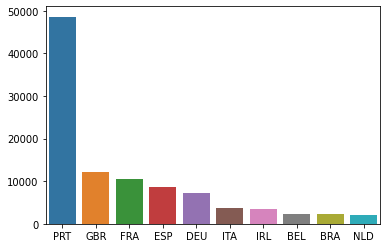

In [14]:
# 
sns.barplot(y=list(hotel_booking.country.value_counts().head (10)),x= list(hotel_booking.country.value_counts().head(10).index))

Text(0, 0.5, 'ADR')

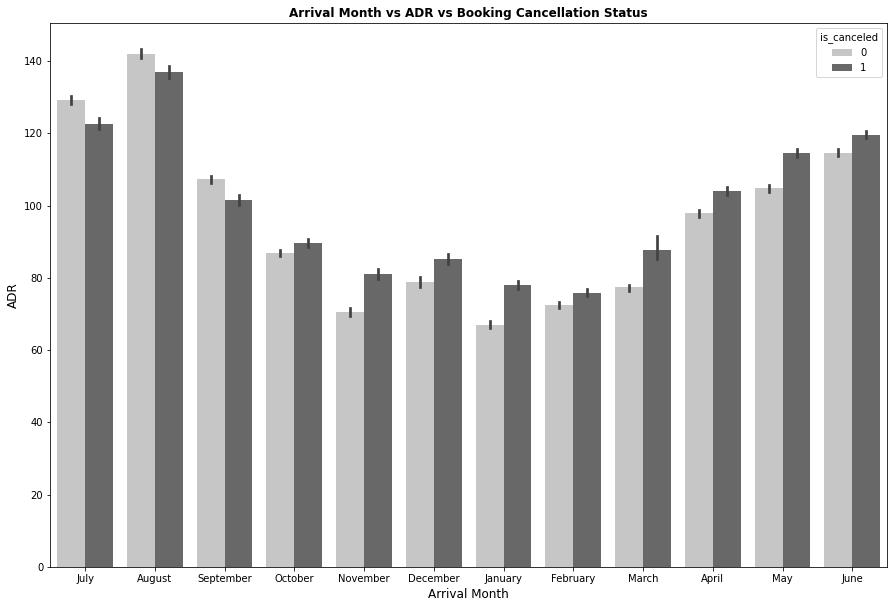

In [34]:
hotel_booking['adr'] = hotel_booking['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'Greys', data=hotel_booking)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

In [ ]:
hotel_booking['assigned_room_type'].unique()


In [ ]:
hotel_booking[ttt] = hotel_booking.replace

In [46]:
hotel_booking['total_staying_nights'] = hotel_booking['stays_in_week_nights'] + hotel_booking['stays_in_weekend_nights']
total_staying = hotel_booking.groupby('total_staying_nights').agg({'adr': 'mean'})
print(total_staying)

                             adr
total_staying_nights            
0                       0.000000
1                      94.697787
2                      97.723088
3                     105.152492
4                     104.970035
5                     113.223704
6                     119.876025
7                     103.422341
8                     113.954574
9                     114.614197
10                    108.069737
11                    107.955429
12                    105.273363
13                    111.939225
14                     94.768144
15                     91.564400
16                     94.694750
17                     95.355000
18                     78.929429
19                     99.495455
20                     76.225000
21                     77.982676
22                     75.461429
23                     60.762500
24                     83.590000
25                     58.608378
26                     73.790000
27                     63.760000
28        

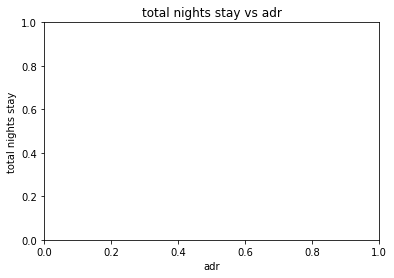

In [56]:
total_staying.plot.bar
plt.xlabel("adr")
plt.ylabel("total nights stay")
plt.title("total nights stay vs adr")
plt.show()

In [59]:
hotel_booking.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)